In [1]:
# 1. Sklearn datasets의 iris data를 불러와서, Pandas DataFrame으로 바꾸세요.
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print(iris)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# 2. 1번의 데이터에 결측치가 있는지 체크하고, 결측치가 존재하면 평균값을 넣으세요.
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [3]:
# 3. 1번의 데이터의 평균, 표준편차, 4분위 수를 구하세요. Label의 값을 1이면 1, 1이 아니면 0으로 수정하세요.
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris_df['target'] = iris.target
iris_df["label"] = 0
iris_df["label"] = iris_df["label"].where(iris_df["target"]!=1,1)

In [16]:
iris_df.drop(["target"],axis=1,inplace=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# 4. MinMaxScaler()을 사용해 전처리를 한뒤, train set과 test set을 train_test_split을 사용하여 
# test size을 0.25만큼 분리하세요
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scale = scaler.transform(iris_df)
#x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=11)
x_train, x_test, y_train, y_test = train_test_split(iris_scale[:,:-1], iris_scale[:,-1], test_size=0.25, random_state=11)

In [18]:
# 5. 위에서 만든 train set을 RandomForestClassifier기본 파라메터를 사용하여 학습하고, 정확도(accuracy)를 구하세요.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('Random Forest Classifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


Random Forest Classifier 정확도:0.9211


In [22]:
# 6. train set을 RandomForestClassifier 기본 파라메터를 사용하여 학습하고, 오차행렬, 
# 정밀도와 재현율, F1 스코어를 구하고 ROC커브를 그리세요.
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

confusion = confusion_matrix(y_test,rf_pred)
accuracy = accuracy_score(y_test,rf_pred)
precision = precision_score(y_test,rf_pred,average='weighted')
recall = recall_score(y_test,rf_pred,average='weighted')

print("오차행렬")
print(confusion)
print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}".format(accuracy, precision, recall))

f1 = f1_score(y_test,rf_pred,average='weighted')
print("F1 Score: {0:.4f}".format(f1))

pred_proba1 = rf_clf.predict(x_test)

오차행렬
[[25  2]
 [ 1 10]]
정확도: 0.9211, 정밀도: 0.9244, 재현율: 0.9211
F1 Score: 0.9220


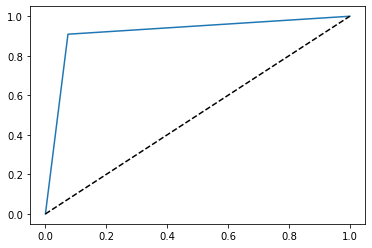

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fprs, tprs, thresholds = roc_curve(y_test, pred_proba1)
plt.plot(fprs, tprs, label="ROC")
plt.plot([0,1],[0,1],'k--', label="Random")

In [36]:
# 7. 6번의 결과 중 2종 오류를 범하기 않기 위해서 주의 깊게 봐야하는 것은 무엇인가요?


In [33]:
# 8. 3번의 데이터를 Get_dummies를 사용해 iris data의 label을 범주형데이터로 바꿔서 기존 df에 붙이고, 
# 기존의 label은 df에서 삭제하세요.
iris_new = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_new['label'] = iris.target
iris_new = pd.get_dummies(iris_new, columns=['label'])
iris_new.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_0,label_1,label_2
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1


In [38]:
# 9. 데이터를 GridSearchCV를 사용해서 RandomForestClassifier을 교차검증과 최적 파라메터 튜닝을 수행하여, 
# 정확도를 다시 구하세요.
# 파라메터 예시 : params = { 'n_estimators' : [10, 100],
#           'max_depth' : [3, 5, 7,],
#           'min_samples_leaf' : [8, 12],
#           'min_samples_split' : [8, 16]
#            }

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.25, random_state=11)

rfc = RandomForestClassifier()
params = { 'n_estimators' : [10, 100], 'max_depth' : [3, 5, 7,],
          'min_samples_leaf' : [8, 12], 'min_samples_split' : [8, 16]}

grid_rfc = GridSearchCV(rfc, param_grid=params, cv=5, refit=True)
grid_rfc.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_rfc.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 3, 'min_samples_leaf': 8, 'min_s...",0.955731,15,0.869565,1.0,1.0
1,"{'max_depth': 3, 'min_samples_leaf': 8, 'min_s...",0.955731,15,0.869565,1.0,1.0
2,"{'max_depth': 3, 'min_samples_leaf': 8, 'min_s...",0.973518,1,0.913043,1.0,1.0
3,"{'max_depth': 3, 'min_samples_leaf': 8, 'min_s...",0.964427,4,0.913043,1.0,1.0
4,"{'max_depth': 3, 'min_samples_leaf': 12, 'min_...",0.964427,4,0.913043,1.0,1.0
5,"{'max_depth': 3, 'min_samples_leaf': 12, 'min_...",0.964427,4,0.913043,1.0,1.0
6,"{'max_depth': 3, 'min_samples_leaf': 12, 'min_...",0.973518,1,0.913043,1.0,1.0
7,"{'max_depth': 3, 'min_samples_leaf': 12, 'min_...",0.964427,4,0.913043,1.0,1.0
8,"{'max_depth': 5, 'min_samples_leaf': 8, 'min_s...",0.955336,22,0.913043,1.0,1.0
9,"{'max_depth': 5, 'min_samples_leaf': 8, 'min_s...",0.964427,4,0.913043,1.0,1.0


In [40]:
print('GridSearchCV 최적 파라미터:', grid_rfc.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rfc.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 10}
GridSearchCV 최고 정확도: 0.9735


"\n# summarize feature importance\nfor i,v in enumerate(np.argsort(importance)):\n\tprint('Feature: %0d, Score: %.5f' % (i,v))\n# plot feature importance\nplt.bar([x for x in range(len(np.argsort(importance)))], importance)\nplt.show()\n"

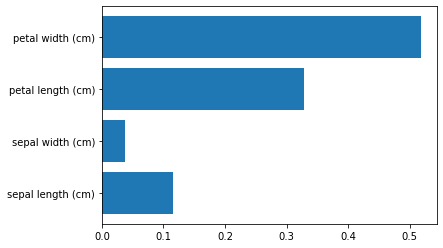

In [56]:
# 10. 9번에서 학습한 모델 결과의 각 피쳐별 중요도를 그래프로 보이세요.
# (rf_clf.feature_importances_)

estimator = grid_rfc.best_estimator_
importances = estimator.feature_importances_
sort = estimator.feature_importances_.argsort()
plt.barh(iris.feature_names, estimator.feature_importances_)
